[[5.86448908 5.86448908 5.86448908 ... 1.56919956 1.56919956 1.56919956]
 [5.86451292 5.86451292 5.86162806 ... 1.56919956 1.56919956 1.56919956]
 [5.66955805 5.66955805 5.66955805 ... 1.56919956 1.56919956 1.56919956]
 ...
 [0.39732456 0.39732456 0.39732456 ... 3.52084637 3.52232456 3.52232456]
 [0.39732456 0.59263706 0.59263706 ... 3.71764898 3.71764898 3.71764898]
 [0.59263706 0.59263706 0.59263706 ... 3.71764898 3.71764898 3.71764898]]


/var/folders/sm/jzy3nhps7rsb__ng8543svqc0000gn/T/ipykernel_43860/4034558854.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


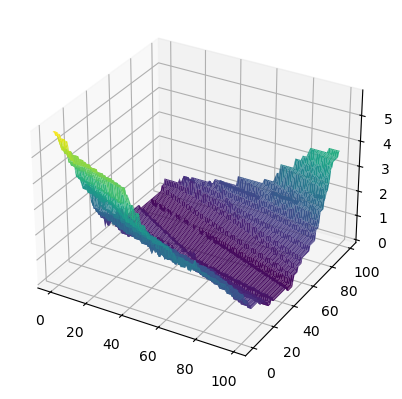

In [15]:
import numpy as np
import matplotlib.pyplot as plt
STEPS=100
lf = np.loadtxt('p1-set2.txt')
print(lf)
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
ax.plot_surface(X, Y, lf, rstride=1, cstride=1,
cmap='viridis', edgecolor='none')
fig.show()


In [25]:
import numpy as np
import torch

# 定义步数
STEPS = 100

# 读取文件数据
lf = np.loadtxt('p1-set2.txt')

# 创建二维的1到100的特征张量
X = np.array([[j+1 for j in range(STEPS)] for i in range(STEPS)])
Y = np.array([[i+1 for _ in range(STEPS)] for i in range(STEPS)])

# 展平特征数据
features = np.stack((Y.flatten(), X.flatten()), axis=-1)

# 展平标签数据
labels = lf.flatten()


# 转换为PyTorch张量
tensor_features = torch.tensor(features,dtype= torch.float32)
tensor_labels = torch.tensor(labels,dtype=torch.float32)


# 打印张量形状以验证
print(tensor_features.shape)  # 应该是 (10000, 2)
print(tensor_labels.shape)    # 应该是 (10000,)
print(labels)

torch.Size([10000, 2])
torch.Size([10000])
[5.86448908 5.86448908 5.86448908 ... 3.71764898 3.71764898 3.71764898]


In [29]:
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 假设lf是你的数据数组，这里用示例数据代替
# lf = np.loadtxt('p1-set2.txt')

# 数据标准化
# print(labels)
# print(data)
# 转换为Tensor


data = torch.tensor(tensor_features, dtype=torch.float32)
print(data)
labels = torch.tensor(tensor_labels, dtype=torch.float32).view(-1, 1)

# 定义神经网络结构
input_size = 2
hidden_size = 16
hidden_size2 = 256
output_size = 1

# 初始化神经网络
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(hidden_size, hidden_size2),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(hidden_size2, output_size)
)


for m in model.modules():
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight.data)
        
# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# 训练神经网络
epochs = 5000
for epoch in range(epochs):
    # 前向传播
    outputs = model(tensor_features)
    loss = criterion(outputs, tensor_labels)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# 打印最后的图像
# 获取模型的预测结果
predictions = model(data).detach().numpy()


tensor([[-1.7148, -1.7148],
        [-1.7148, -1.6802],
        [-1.7148, -1.6455],
        ...,
        [ 1.7148,  1.6455],
        [ 1.7148,  1.6802],
        [ 1.7148,  1.7148]])


/var/folders/sm/jzy3nhps7rsb__ng8543svqc0000gn/T/ipykernel_43860/1662428844.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(tensor_labels, dtype=torch.float32).view(-1, 1)


TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [45]:
predictions = model(data).detach().numpy()
print(predictions)

[[ 91.70153]
 [113.34224]
 [116.4276 ]
 ...
 [115.52417]
 [104.2253 ]
 [120.84465]]


/var/folders/sm/jzy3nhps7rsb__ng8543svqc0000gn/T/ipykernel_43860/3497099816.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(tensor_labels, dtype=torch.float32).view(-1, 1)


Epoch 0, Loss: 2.858773946762085
Epoch 100, Loss: 0.030150096863508224
Epoch 200, Loss: 0.015553646720945835
Epoch 300, Loss: 0.014363429509103298
Epoch 400, Loss: 0.013938038609921932
Epoch 500, Loss: 0.013795405626296997
Epoch 600, Loss: 0.013711996376514435
Epoch 700, Loss: 0.013639355078339577
Epoch 800, Loss: 0.013582396320998669
Epoch 900, Loss: 0.013520807959139347
Epoch 1000, Loss: 0.013426118530333042
Epoch 1100, Loss: 0.013240314088761806
Epoch 1200, Loss: 0.012952342629432678
Epoch 1300, Loss: 0.01284358836710453
Epoch 1400, Loss: 0.012737995944917202
Epoch 1500, Loss: 0.012676669284701347
Epoch 1600, Loss: 0.02215115912258625
Epoch 1700, Loss: 0.012573054991662502
Epoch 1800, Loss: 0.015893196687102318
Epoch 1900, Loss: 0.012447469867765903
Epoch 2000, Loss: 0.012343784794211388
Epoch 2100, Loss: 0.012296274304389954
Epoch 2200, Loss: 0.012168769724667072
Epoch 2300, Loss: 0.01211532112210989
Epoch 2400, Loss: 0.0118860537186265
Epoch 2500, Loss: 0.011659299023449421
Epoch 

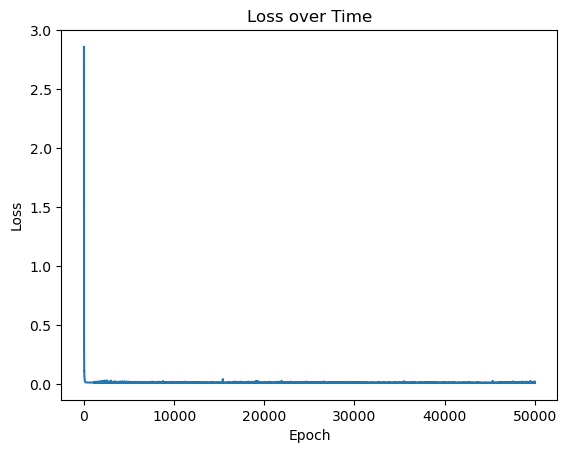

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 假设lf是你的数据数组，这里用示例数据代替
# lf = np.loadtxt('p1-set2.txt')

# 示例数据
tensor_features = torch.tensor(features,dtype= torch.float32)
tensor_labels = torch.tensor(labels,dtype=torch.float32)

# 数据标准化
scaler = StandardScaler()
tensor_features = scaler.fit_transform(tensor_features)

# 转换为Tensor
data = torch.tensor(tensor_features, dtype=torch.float32)
labels = torch.tensor(tensor_labels, dtype=torch.float32).view(-1, 1)

# 定义神经网络结构
input_size = 2
hidden_size1 = 32
hidden_size2 = 64
output_size = 1

# 初始化神经网络
model = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.ReLU(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.Linear(hidden_size2, output_size)
)

# 权重初始化
# for m in model.modules():
#     if isinstance(m, nn.Linear):
#         nn.init.xavier_uniform_(m.weight.data)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练神经网络
epochs = 50000
losses = []
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# 打印最后的图像
# 获取模型的预测结果
predictions = model(data).detach().numpy()

# 绘制损失曲线
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.show()

In [28]:
predictions = model(data).detach().numpy()
print(predictions)

[[ 1.3992339 ]
 [ 0.82634574]
 [ 4.9093013 ]
 ...
 [-4.8266215 ]
 [ 2.3781326 ]
 [-6.338409  ]]


Epoch 0, Loss: 0.3852315917611122
Epoch 100, Loss: 0.07804135605692863
Epoch 200, Loss: 0.059029641561210155
Epoch 300, Loss: 0.08426631521433592
Epoch 400, Loss: 0.06847371719777584
Epoch 500, Loss: 0.05622161505743861
Epoch 600, Loss: 0.0672251395881176
Epoch 700, Loss: 0.05382191576063633
Epoch 800, Loss: 0.05825147870928049
Epoch 900, Loss: 0.0783810131251812
Epoch 1000, Loss: 0.06711768358945847
Epoch 1100, Loss: 0.05435085389763117
Epoch 1200, Loss: 0.06594732496887445
Epoch 1300, Loss: 0.06913852505385876
Epoch 1400, Loss: 0.06375866662710905
Epoch 1500, Loss: 0.07550836261361837
Epoch 1600, Loss: 0.059399998746812344
Epoch 1700, Loss: 0.06639139261096716
Epoch 1800, Loss: 0.07611210271716118
Early stopping at epoch 1877


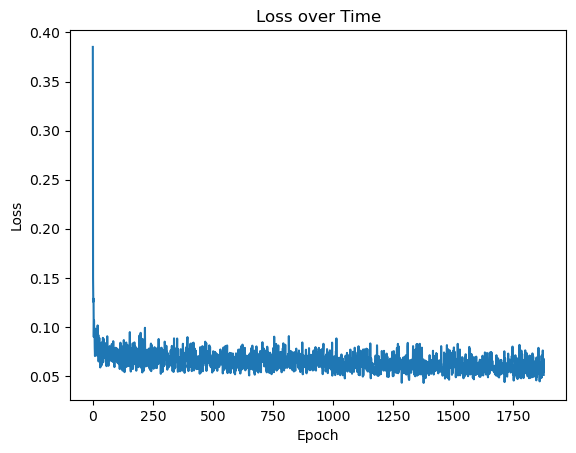

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# 假设lf是你的数据数组，这里用示例数据代替
# lf = np.loadtxt('p1-set2.txt')

# 示例数据
tensor_features = np.random.rand(100, 2)
tensor_labels = np.random.rand(100, 1)

# 数据标准化
scaler = StandardScaler()
tensor_features = scaler.fit_transform(tensor_features)

# 转换为Tensor
data = torch.tensor(tensor_features, dtype=torch.float32)
labels = torch.tensor(tensor_labels, dtype=torch.float32).view(-1, 1)

# 创建数据集和数据加载器
dataset = TensorDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 定义神经网络结构
input_size = 2
hidden_size1 = 64
hidden_size2 = 128
output_size = 1

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size2, output_size)
        )

        # 权重初始化
        for m in self.model.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight.data)
    
    def forward(self, x):
        return self.model(x)

# 初始化神经网络
model = NeuralNetwork()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 学习率调度器
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.1)

# 训练神经网络
epochs = 5000
losses = []
early_stop_threshold = 500
no_improve_epochs = 0
best_loss = float('inf')

for epoch in range(epochs):
    epoch_loss = 0
    for batch_data, batch_labels in dataloader:
        # 前向传播
        outputs = model(batch_data)
        loss = criterion(outputs, batch_labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    epoch_loss /= len(dataloader)
    losses.append(epoch_loss)
    scheduler.step()

    # 早停法
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        no_improve_epochs = 0
    else:
        no_improve_epochs += 1
    
    if no_improve_epochs >= early_stop_threshold:
        print(f"Early stopping at epoch {epoch}")
        break

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss}")

# 打印最后的图像
# 获取模型的预测结果
model.eval()
with torch.no_grad():
    predictions = model(data).numpy()

# 绘制损失曲线
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.show()

In [5]:
import numpy as np

# Define the system of equations
A = np.array([[2, -1, 0],
              [-1, 6, -2],
              [4, -3, 8]], dtype=float)

b = np.array([1, 3, 9], dtype=float)

# Initial guess
x0 = np.zeros_like(b)

# Number of iterations
iterations = 3

def jacobi(A, b, x0, iterations):
    n = len(b)
    x = x0.copy()
    x_new = np.zeros_like(x)
    for k in range(iterations):
        for i in range(n):
            s1 = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s1) / A[i, i]
        x = x_new.copy()
        print(f"Iteration {k+1}: {x}")
    return x

def gauss_seidel(A, b, x0, iterations):
    n = len(b)
    x = x0.copy()
    for k in range(iterations):
        for i in range(n):
            s1 = sum(A[i, j] * x[j] for j in range(i))
            s2 = sum(A[i, j] * x[j] for j in range(i + 1, n))
            x[i] = (b[i] - s1 - s2) / A[i, i]
        print(f"Iteration {k+1}: {x}")
    return x

print("Jacobi Method:")
jacobi_solution = jacobi(A, b, x0, iterations)

print("\nGauss-Seidel Method:")
gauss_seidel_solution = gauss_seidel(A, b, x0, iterations)

Jacobi Method:
Iteration 1: [0.5   0.5   1.125]
Iteration 2: [0.75       0.95833333 1.0625    ]
Iteration 3: [0.97916667 0.97916667 1.109375  ]

Gauss-Seidel Method:
Iteration 1: [0.5        0.58333333 1.09375   ]
Iteration 2: [0.79166667 0.99652778 1.10286458]
Iteration 3: [0.99826389 1.03399884 1.01361762]


In [6]:
import numpy as np

A = np.array([[1, 0, -2],
              [-0.5, 1, -0.25],
              [1, -0.5, 1]], dtype=float)

b = np.array([ 0.2, -1.425,2], dtype=float)

x0 = np.zeros_like(b)

tolerance = 1e-2
max_iterations = 300

def gauss_seidel(A, b, x0, tolerance, max_iterations):
    n = len(b)
    x = x0.copy()
    for k in range(max_iterations):
        x_old = x.copy()
        for i in range(n):
            s1 = sum(A[i, j] * x[j] for j in range(i))
            s2 = sum(A[i, j] * x_old[j] for j in range(i + 1, n))
            x[i] = (b[i] - s1 - s2) / A[i, i]
        if np.linalg.norm(x - x_old, ord=np.inf) < tolerance:
            print(f"Converged in {k+1} iterations.")
            return x
    print("Maximum iterations reached without convergence.")
    return x

solution = gauss_seidel(A, b, x0, tolerance, max_iterations)
print("Approximate solution:", solution)

Maximum iterations reached without convergence.
Approximate solution: [ 2.15687283e+41  1.34804552e+41 -1.48285007e+41]
